# Importing the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import sklearn

## As it was a csv i used a delimmeter to seprate the data into columns.

In [2]:
df = pd.read_csv('/kaggle/input/bank-data-additional/bank-additional-full.csv',delimiter=';')

In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
df1 = df.copy()

In [5]:
df1.to_csv('bank_data.csv',index=False)

##Our dataset shape is 41188 rows and 21 columns.

In [6]:
df.shape

(41188, 21)

##List of Columns

In [7]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

##We do df.describe and check that if there is any outlier or disturbance in the data

In [8]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


##Checking for Null values

In [9]:
print(df.isna().sum(),df.isnull().sum())

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64 age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


##Data types in the data.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

##Make a list of all cat_columns

In [11]:
for dtype in df.dtypes.unique():
    cat_columns = list(df.select_dtypes(include = object).columns)

print(cat_columns)

['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']


##Uniques

In [12]:
for col in cat_columns:
    print(f"{col} : {df[col].unique()}")

job : ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
marital : ['married' 'single' 'divorced' 'unknown']
education : ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
default : ['no' 'unknown' 'yes']
housing : ['no' 'yes' 'unknown']
loan : ['no' 'yes' 'unknown']
contact : ['telephone' 'cellular']
month : ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
day_of_week : ['mon' 'tue' 'wed' 'thu' 'fri']
poutcome : ['nonexistent' 'failure' 'success']
y : ['no' 'yes']


##Corr Matrix

#Encoding the cat_columns

In [13]:
from sklearn.preprocessing import LabelEncoder


le = LabelEncoder()
for col in cat_columns:
    df[col] = le.fit_transform(df[col])

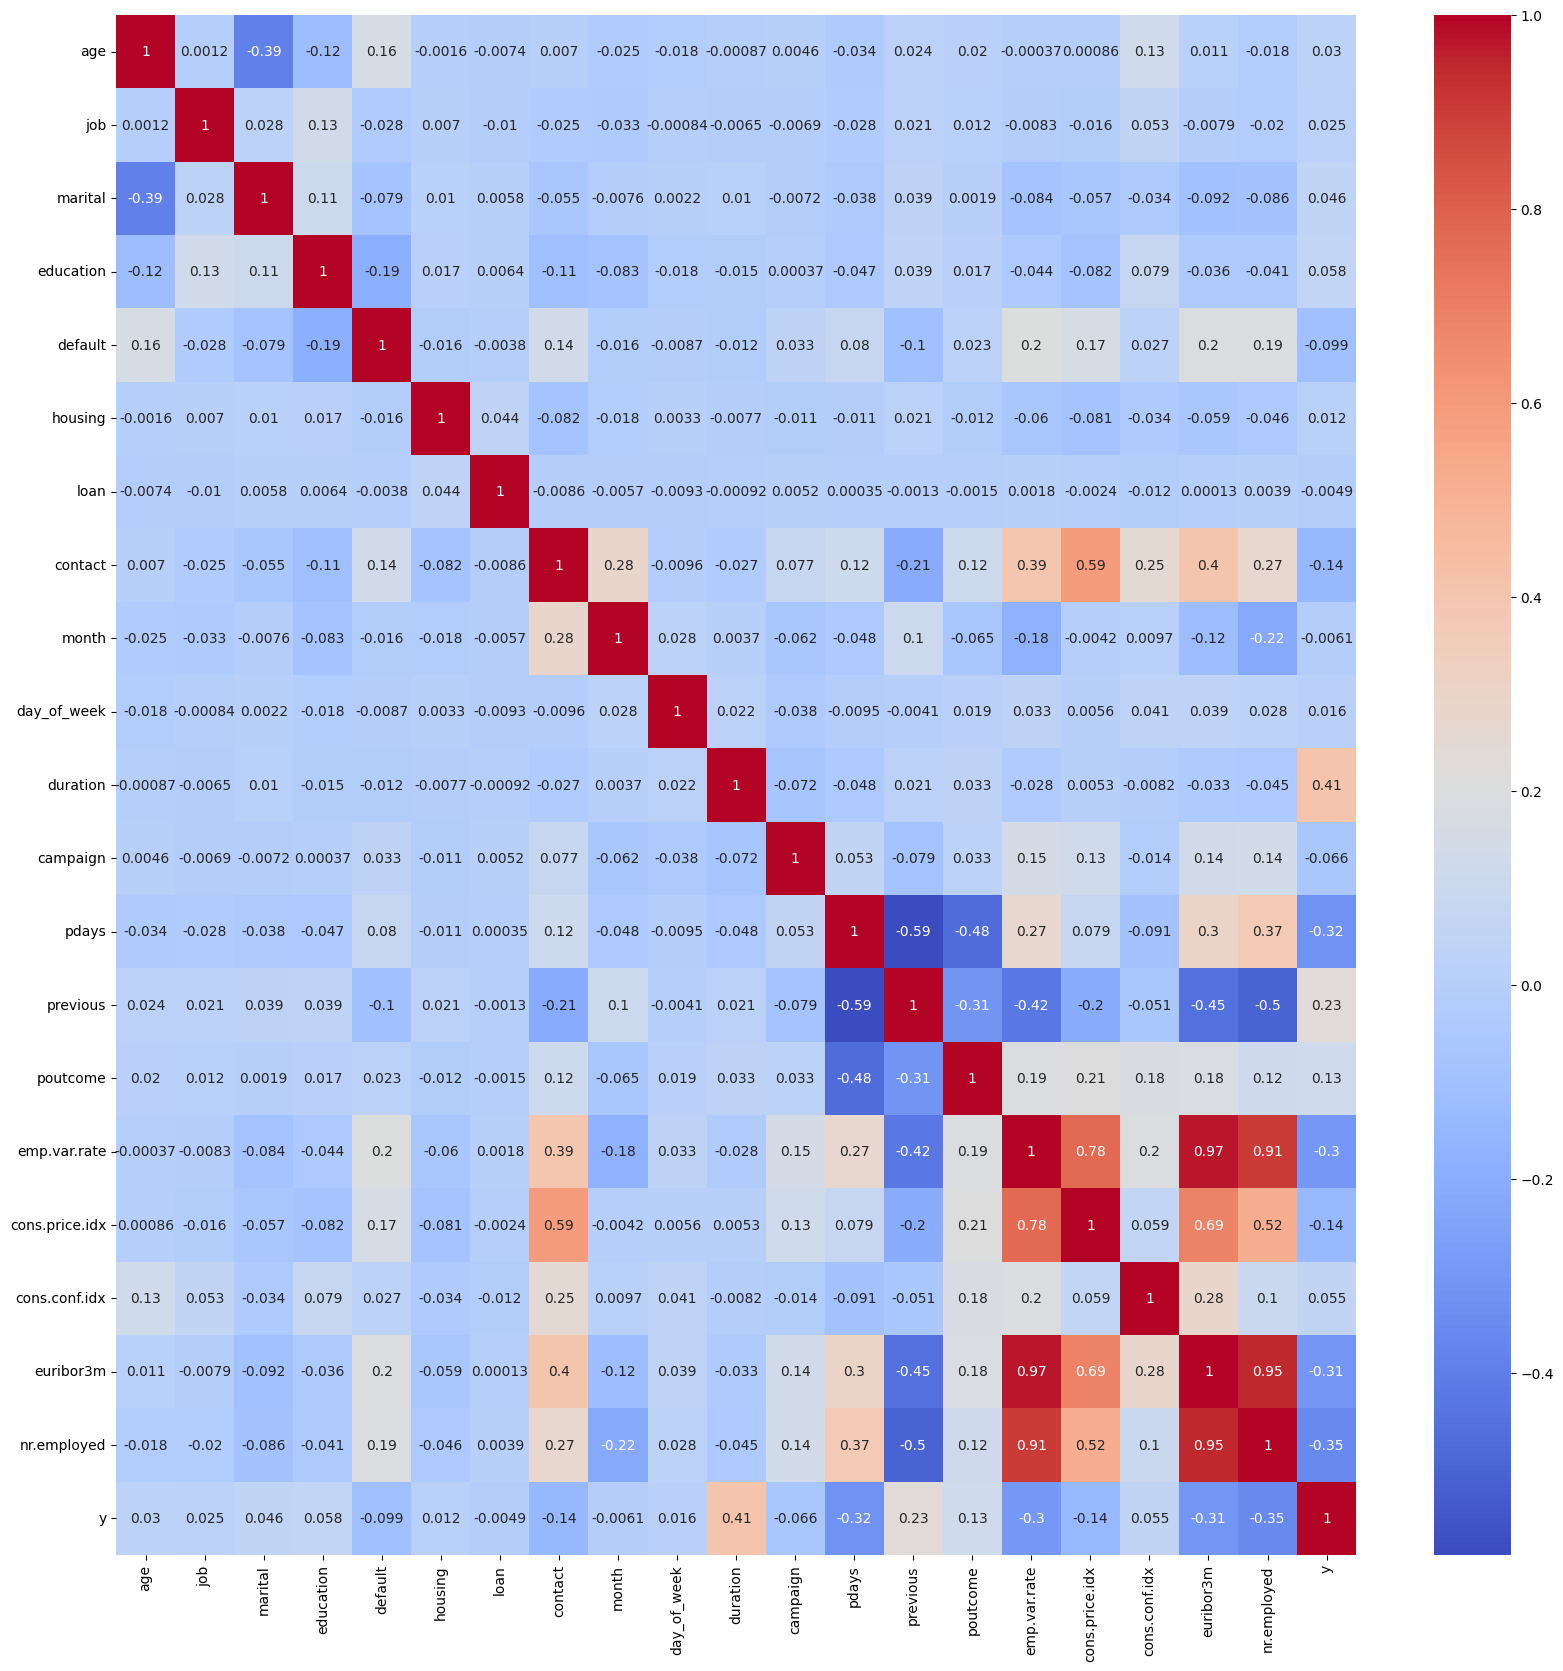

In [14]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.show()

In [15]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,2,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0


#Splitting The Dataset in 70 - 30

In [16]:
from sklearn.model_selection import train_test_split

X = df.drop('y',axis=1)
y = df['y']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

#Using the LogisticRegression model to train the dataset

In [17]:
#importing the model
from sklearn.linear_model import LogisticRegression as logisticRegression

#declaring the model
model =logisticRegression()
#we fit the model
model.fit(X_train,y_train)

#We save the predictions
y_pred = model.predict(X_test)

#We save the probability estimates for both classes.
y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

##Metrics of Default LR

In [18]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

LRaccuracy = accuracy_score(y_test,y_pred)*100
LRprescesion = precision_score(y_test,y_pred)*100
LRrecall = recall_score(y_test,y_pred)*100
LRf1 = f1_score(y_test,y_pred)*100

print("Linear Regression metrics = ", '\nAccuracy:',LRaccuracy , '\nPrecision:',LRprescesion, '\nRecall:',LRrecall, '\nF1:',LRf1)

Linear Regression metrics =  
Accuracy: 91.13862588006798 
Precision: 67.66826923076923 
Recall: 40.532757379409645 
F1: 50.69788383610986


##Confusion Matrix for LR

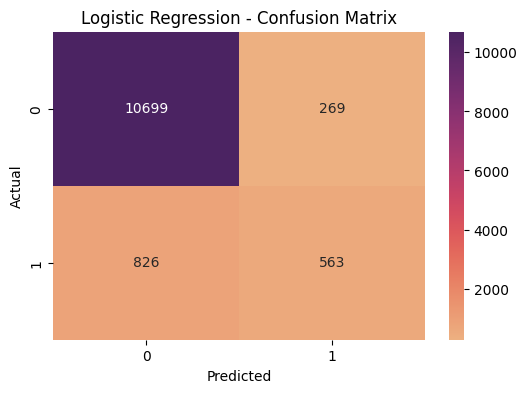

In [19]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

LRconfusion_matrix = confusion_matrix(y_test,y_pred)


plt.figure(figsize=(6, 4))
sns.heatmap(LRconfusion_matrix, annot=True, fmt='d', cmap = 'flare')
plt.title("Logistic Regression - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


##ROC curve and AUC

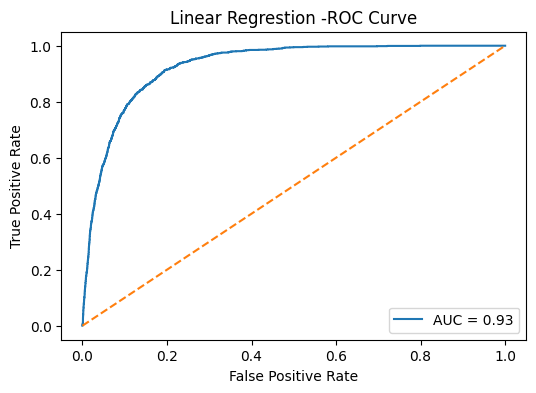

In [20]:
from sklearn.metrics import roc_curve, auc


if y_proba is not None:
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        roc_auc = auc(fpr, tpr)
        plt.figure(figsize=(6, 4))
        plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
        plt.plot([0, 1], [0, 1], linestyle='--')
        plt.title('Linear Regrestion -ROC Curve')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.legend(loc="lower right")


##Classification Report for LR

In [21]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95     10968
           1       0.68      0.41      0.51      1389

    accuracy                           0.91     12357
   macro avg       0.80      0.69      0.73     12357
weighted avg       0.90      0.91      0.90     12357



#Training the data using remaining models together using for loops

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(probability=True),
    'Naive Bayes': GaussianNB(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'XGBoost': XGBClassifier(),
}

In [23]:
for model_name,model in models.items():
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

In [24]:
results = {}

for name, model in models.items():
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    results[name] = {'Accuracy': acc, 'Precision': prec, 'Recall': rec, 'F1 Score': f1}
    print(f"{name} - Accuracy: {acc}, Precision: {prec}, Recall: {rec}, F1 Score: {f1}")


Decision Tree - Accuracy: 0.889698146799385, Precision: 0.5092460881934566, Recall: 0.515478761699064, F1 Score: 0.5123434704830052
Random Forest - Accuracy: 0.9156753257263089, Precision: 0.6616961789375583, Recall: 0.5111591072714183, F1 Score: 0.5767668562144598
Support Vector Machine - Accuracy: 0.8970623937848993, Precision: 0.6211180124223602, Recall: 0.2159827213822894, F1 Score: 0.3205128205128205
Naive Bayes - Accuracy: 0.8501254349761269, Precision: 0.3930715935334873, Recall: 0.6126709863210943, F1 Score: 0.47889701744513224
K-Nearest Neighbors - Accuracy: 0.903293679695719, Precision: 0.585387323943662, Recall: 0.4787616990640749, F1 Score: 0.5267326732673269
XGBoost - Accuracy: 0.9138949583232177, Precision: 0.638533674339301, Recall: 0.5392368610511159, F1 Score: 0.5846994535519126


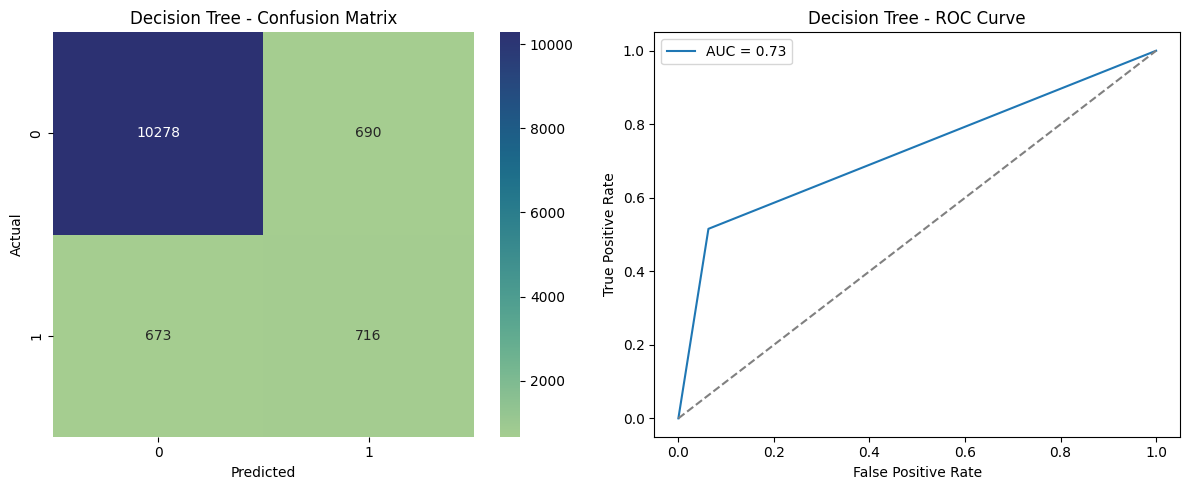

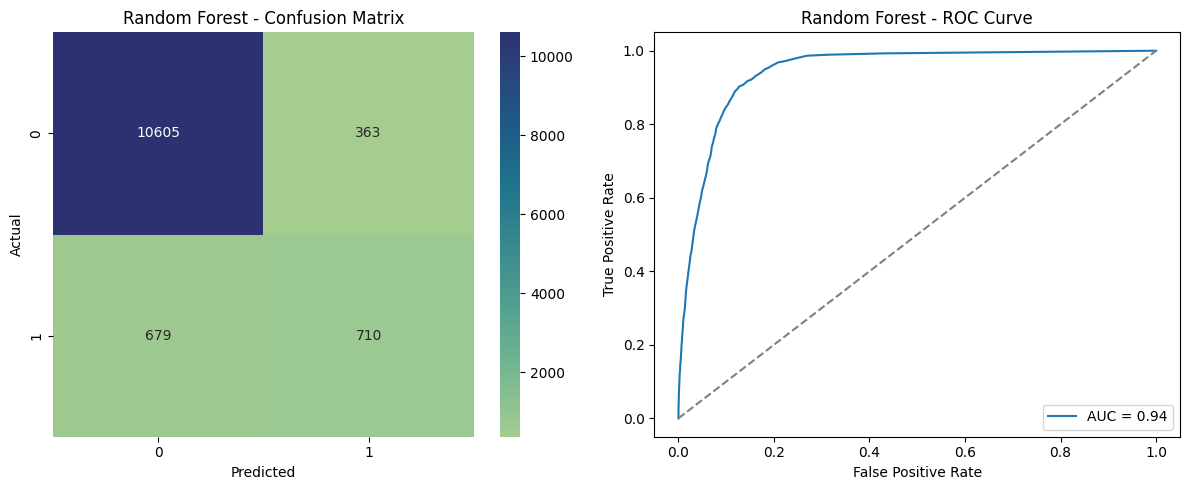

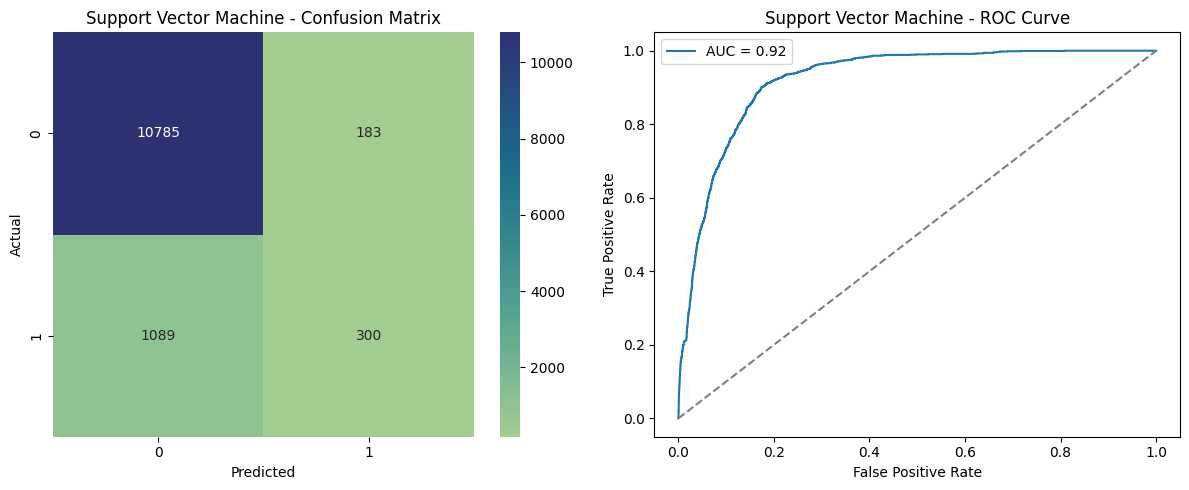

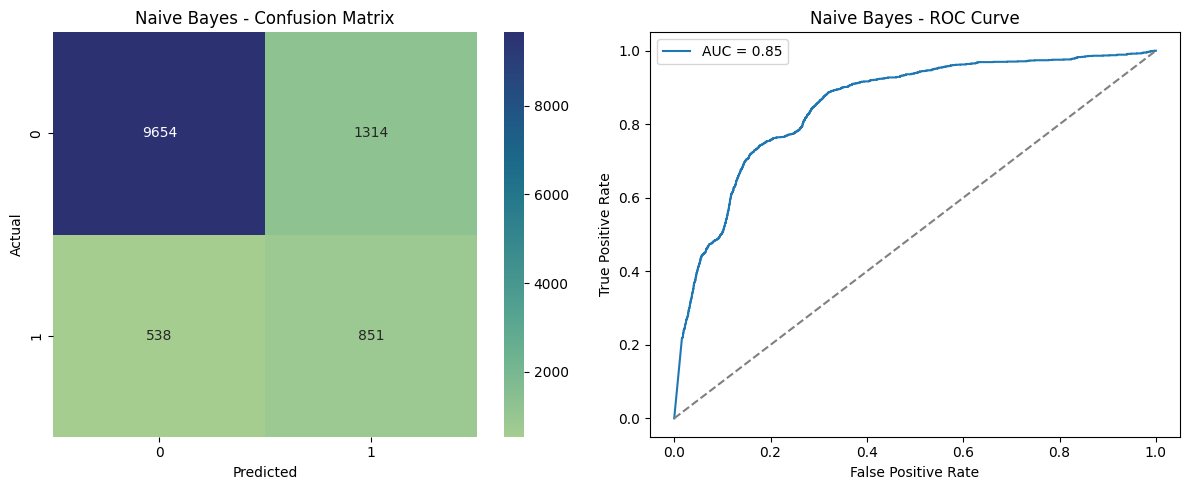

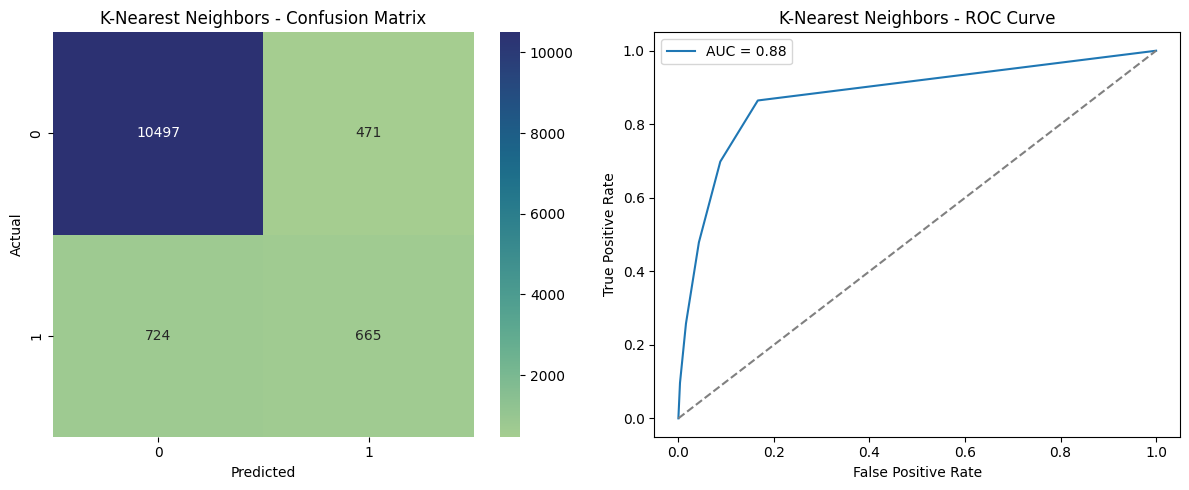

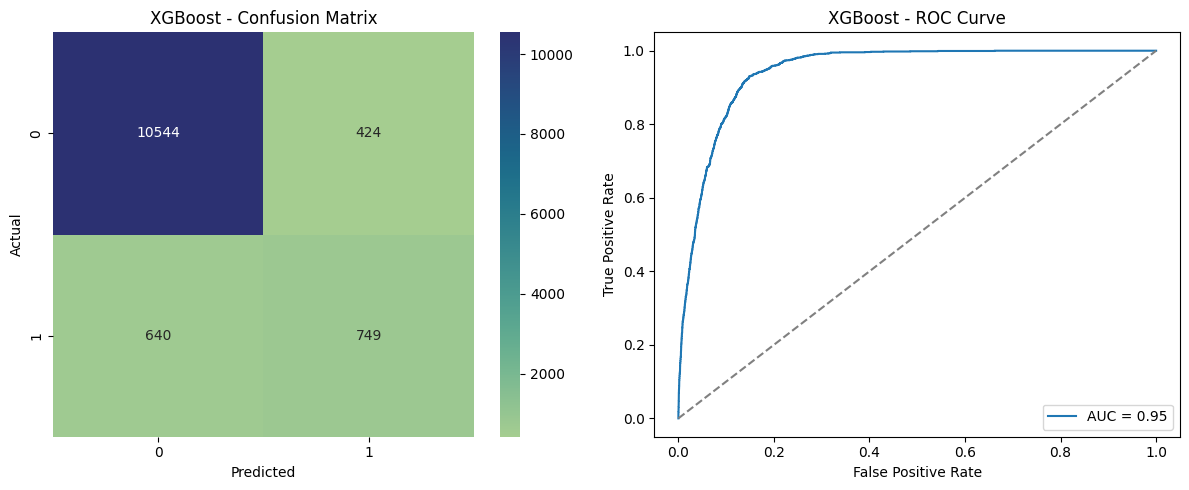

In [25]:
from sklearn.metrics import confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

for model_name, model in models.items():
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='crest', ax=axes[0])
    axes[0].set_title(f'{model_name} - Confusion Matrix')
    axes[0].set_xlabel('Predicted')
    axes[0].set_ylabel('Actual')

    # ROC Curve
    if y_proba is not None:
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        roc_auc = auc(fpr, tpr)
        axes[1].plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
        axes[1].plot([0, 1], [0, 1], linestyle='--', color='gray')
        axes[1].set_title(f'{model_name} - ROC Curve')
        axes[1].set_xlabel('False Positive Rate')
        axes[1].set_ylabel('True Positive Rate')
        axes[1].legend()

    plt.tight_layout()
    plt.show()


In [26]:
for model_name, model in models.items():
    print(f"Classification Report for {model_name}:")
    print(classification_report(y_test, y_pred))
    print("\n")

Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95     10968
           1       0.64      0.54      0.58      1389

    accuracy                           0.91     12357
   macro avg       0.79      0.75      0.77     12357
weighted avg       0.91      0.91      0.91     12357



Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95     10968
           1       0.64      0.54      0.58      1389

    accuracy                           0.91     12357
   macro avg       0.79      0.75      0.77     12357
weighted avg       0.91      0.91      0.91     12357



Classification Report for Support Vector Machine:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95     10968
           1       0.64      0.54      0.58      1389

    accuracy                           0.91   

#Comparisons of the Pre Trained Models

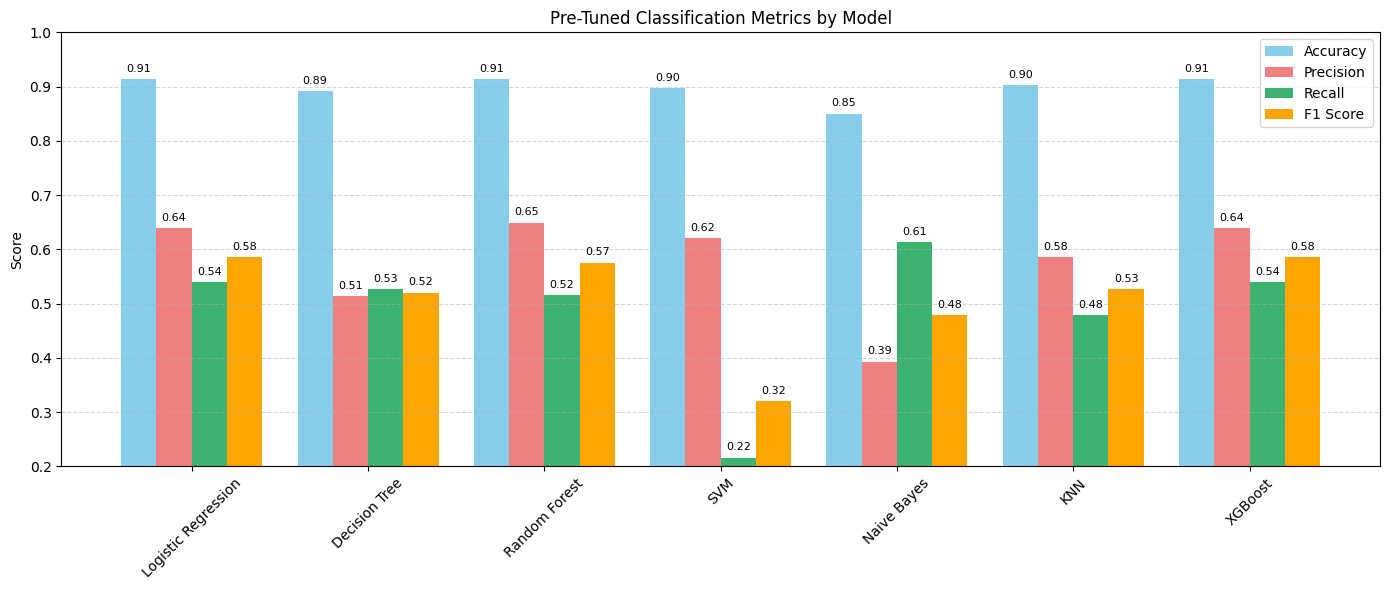

In [27]:
import matplotlib.pyplot as plt
import numpy as np

models = [
    'Logistic Regression', 'Decision Tree', 'Random Forest',
    'SVM', 'Naive Bayes', 'KNN', 'XGBoost'
]

accuracy =  [91.38, 89.08, 91.42, 89.71, 85.01, 90.33, 91.39]
precision = [63.85, 51.41, 64.91, 62.11, 39.31, 58.54, 63.85]
recall =    [53.92, 52.63, 51.55, 21.60, 61.27, 47.88, 53.92]
f1_score =  [58.46, 52.01, 57.46, 32.05, 47.89, 52.67, 58.47]

accuracy = [round(a/100, 3) for a in accuracy]
precision = [round(p/100, 3) for p in precision]
recall = [round(r/100, 3) for r in recall]
f1_score = [round(f/100, 3) for f in f1_score]

x = np.arange(len(models))
bar_width = 0.2

plt.figure(figsize=(14, 6))
bars1 = plt.bar(x - 1.5*bar_width, accuracy, width=bar_width, label='Accuracy', color='skyblue')
bars2 = plt.bar(x - 0.5*bar_width, precision, width=bar_width, label='Precision', color='lightcoral')
bars3 = plt.bar(x + 0.5*bar_width, recall, width=bar_width, label='Recall', color='mediumseagreen')
bars4 = plt.bar(x + 1.5*bar_width, f1_score, width=bar_width, label='F1 Score', color='orange')


for bars in [bars1, bars2, bars3, bars4]:
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                 f'{height:.2f}', ha='center', va='bottom', fontsize=8)

plt.xticks(ticks=x, labels=models, rotation=45)
plt.ylim(0.2, 1.0)
plt.ylabel('Score')
plt.title('Pre-Tuned Classification Metrics by Model')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


##Best Overall Model (Pre-Tuned):
- XGBoost: Strong across all metrics (Accuracy: 91.39%, F1: 58.47%), consistent Precision and Recall.

- Random Forest is very close, with highest Precision (64.91%) and high Accuracy.


###High Precision Models:
- Random Forest (64.91%) and XGBoost (63.85%) indicate fewer false positives.

- Logistic Regression also shows strong Precision (~63.85%).

###High Recall Model:
- Naive Bayes has the highest Recall (~61.27%) but lowest Precision (ap. 39.31%), leading to more false positives.


#Hyperparameter Tuning for Models

##Logistic Regression

In [28]:
from sklearn.model_selection import GridSearchCV

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

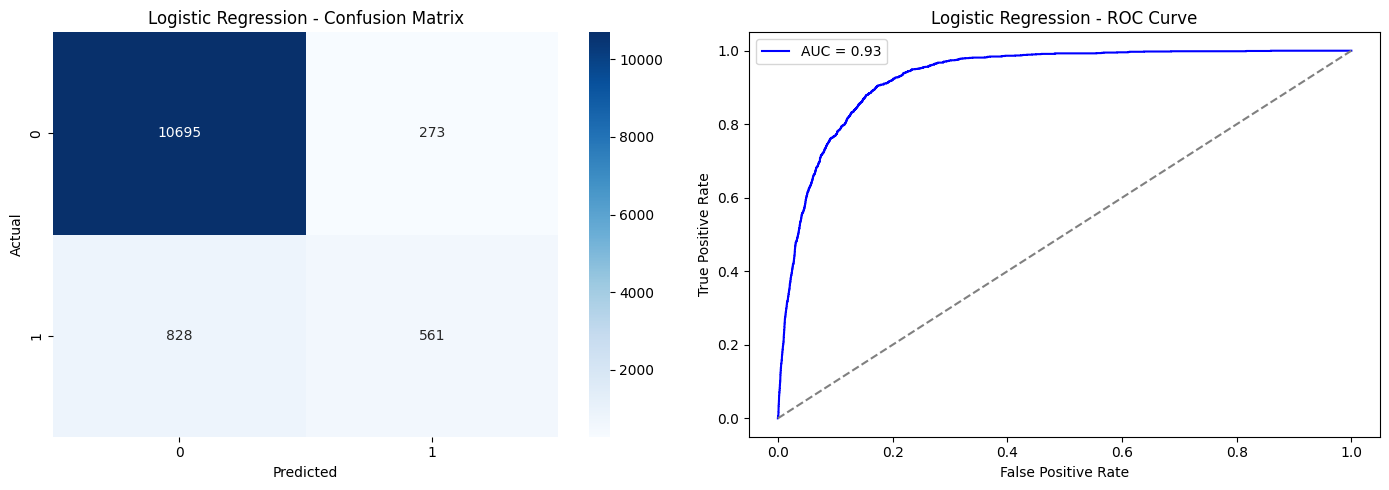

Classification Report - Logistic Regression:

              precision    recall  f1-score   support

           0       0.93      0.98      0.95     10968
           1       0.67      0.40      0.50      1389

    accuracy                           0.91     12357
   macro avg       0.80      0.69      0.73     12357
weighted avg       0.90      0.91      0.90     12357


 Logistic Regression metrics =  
Accuracy: 91.09007040543821 
Precision: 67.26618705035972 
Recall: 40.38876889848812 
F1: 50.472334682860996


In [29]:
from sklearn.linear_model import LogisticRegression

param_grid_lr = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs']
}

grid_lr = GridSearchCV(
    LogisticRegression(max_iter=1000),
    param_grid_lr,
    cv=3,
    scoring='f1',
    n_jobs=-1
)
grid_lr.fit(X_train, y_train)
best_lr = grid_lr.best_estimator_
y_pred_lr = best_lr.predict(X_test)
y_proba_lr = best_lr.predict_proba(X_test)[:, 1]



fig, axes = plt.subplots(1, 2, figsize=(14, 5))


sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Logistic Regression - Confusion Matrix')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')


fpr, tpr, _ = roc_curve(y_test, y_proba_lr)
roc_auc = auc(fpr, tpr)
axes[1].plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}', color='blue')
axes[1].plot([0, 1], [0, 1], linestyle='--', color='gray')
axes[1].set_title('Logistic Regression - ROC Curve')
axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate')
axes[1].legend()


plt.tight_layout()
plt.show()


print("Classification Report - Logistic Regression:\n")
print(classification_report(y_test, y_pred_lr))


from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

lraccuracy = accuracy_score(y_test,y_pred_lr)*100
lrprescesion = precision_score(y_test,y_pred_lr)*100
lrrecall = recall_score(y_test,y_pred_lr)*100
lrf1 = f1_score(y_test,y_pred_lr)*100

print("\n Logistic Regression metrics = ", '\nAccuracy:',lraccuracy , '\nPrecision:',lrprescesion, '\nRecall:',lrrecall, '\nF1:',lrf1)


##K Neighbors Classifier

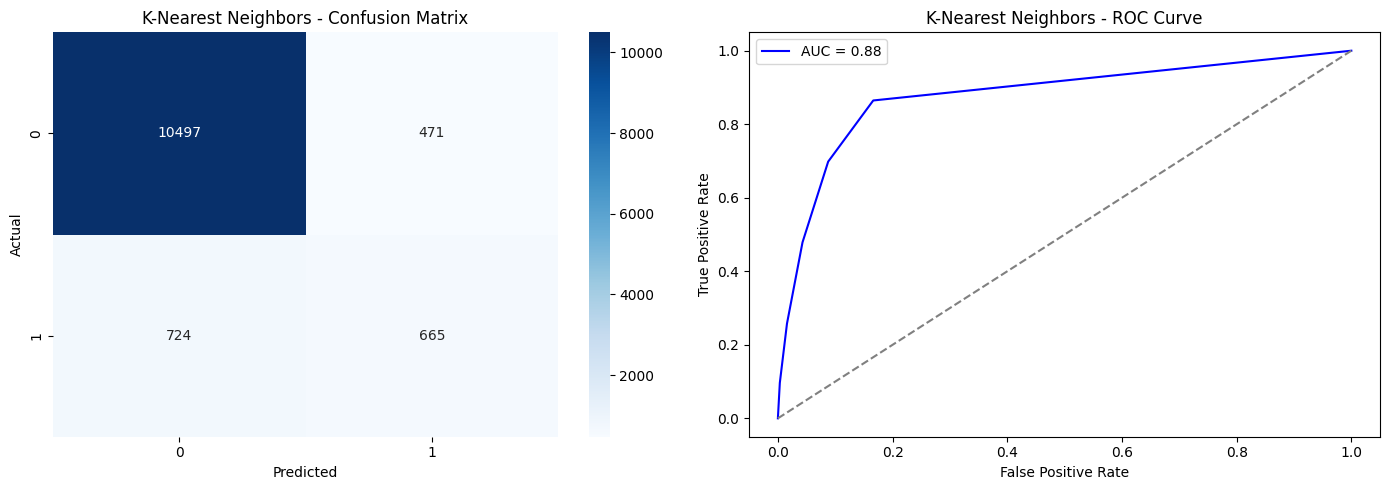

Classification Report - K-Nearest Neighbors:

              precision    recall  f1-score   support

           0       0.94      0.96      0.95     10968
           1       0.59      0.48      0.53      1389

    accuracy                           0.90     12357
   macro avg       0.76      0.72      0.74     12357
weighted avg       0.90      0.90      0.90     12357


K Neighbors Classifier metrics =  
Accuracy: 90.3293679695719 
Precision: 58.5387323943662 
Recall: 47.87616990640749 
F1: 52.673267326732685


In [30]:
from sklearn.neighbors import KNeighborsClassifier

param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance']
}

grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=3, scoring='f1', n_jobs=-1)
grid_knn.fit(X_train, y_train)
best_knn = grid_knn.best_estimator_
y_pred_knn = best_knn.predict(X_test)
y_proba_knn = best_knn.predict_proba(X_test)[:, 1]




fig, axes = plt.subplots(1, 2, figsize=(14, 5))


sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('K-Nearest Neighbors - Confusion Matrix')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')


fpr, tpr, _ = roc_curve(y_test, y_proba_knn)
roc_auc = auc(fpr, tpr)
axes[1].plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}', color='blue')
axes[1].plot([0, 1], [0, 1], linestyle='--', color='gray')
axes[1].set_title('K-Nearest Neighbors - ROC Curve')
axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate')
axes[1].legend()

plt.tight_layout()
plt.show()


print("Classification Report - K-Nearest Neighbors:\n")
print(classification_report(y_test, y_pred_knn))


from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

knnaccuracy = accuracy_score(y_test,y_pred_knn)*100
knnprescesion = precision_score(y_test,y_pred_knn)*100
knnrecall = recall_score(y_test,y_pred_knn)*100
knnf1 = f1_score(y_test,y_pred_knn)*100

print("\nK Neighbors Classifier metrics = ", '\nAccuracy:',knnaccuracy , '\nPrecision:',knnprescesion, '\nRecall:',knnrecall, '\nF1:',knnf1)


##Decision Tree Classifier

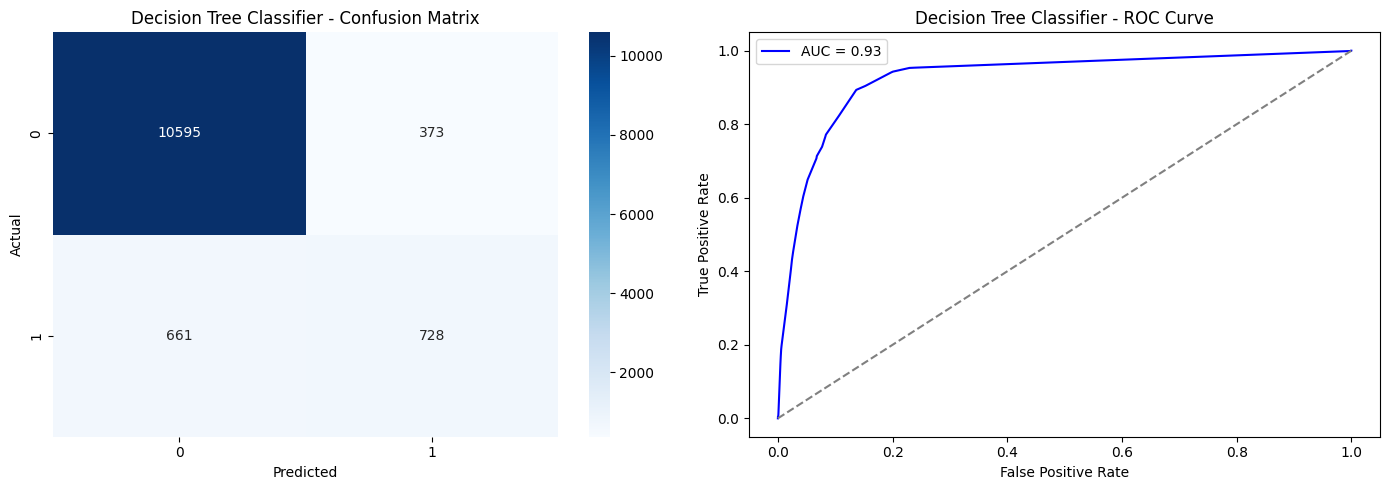

Classification Report - Decision Tree Classifier:

              precision    recall  f1-score   support

           0       0.94      0.97      0.95     10968
           1       0.66      0.52      0.58      1389

    accuracy                           0.92     12357
   macro avg       0.80      0.75      0.77     12357
weighted avg       0.91      0.92      0.91     12357


Tuned Decision Tree Classifier metrics =  
Accuracy: 91.63227320547058 
Precision: 66.12170753860127 
Recall: 52.41180705543557 
F1: 58.47389558232932


In [31]:
from sklearn.tree import DecisionTreeClassifier

param_grid_dt = {
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10]
}

grid_dt = GridSearchCV(DecisionTreeClassifier(), param_grid_dt, cv=3, scoring='f1', n_jobs=-1)
grid_dt.fit(X_train, y_train)
best_dt = grid_dt.best_estimator_
y_pred_dt = best_dt.predict(X_test)
y_proba_dt = best_dt.predict_proba(X_test)[:, 1]


fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Decision Tree Classifier - Confusion Matrix')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba_dt)
roc_auc = auc(fpr, tpr)
axes[1].plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}', color='blue')
axes[1].plot([0, 1], [0, 1], linestyle='--', color='gray')
axes[1].set_title('Decision Tree Classifier - ROC Curve')
axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate')
axes[1].legend()

plt.tight_layout()
plt.show()

print("Classification Report - Decision Tree Classifier:\n")
print(classification_report(y_test, y_pred_dt))




from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

dtaccuracy = accuracy_score(y_test,y_pred_dt)*100
dtprescesion = precision_score(y_test,y_pred_dt)*100
dtrecall = recall_score(y_test,y_pred_dt)*100
dtf1 = f1_score(y_test,y_pred_dt)*100

print("\nTuned Decision Tree Classifier metrics = ", '\nAccuracy:',dtaccuracy , '\nPrecision:',dtprescesion, '\nRecall:',dtrecall, '\nF1:',dtf1)

##Random Forest Classifier

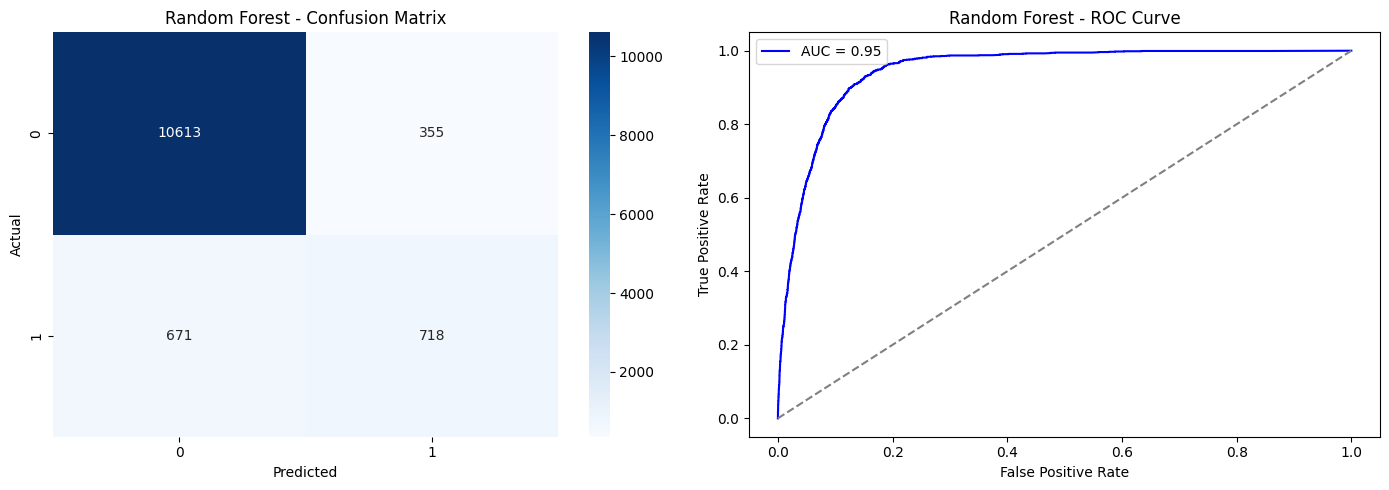

Classification Report - Random Forest:

              precision    recall  f1-score   support

           0       0.94      0.97      0.95     10968
           1       0.67      0.52      0.58      1389

    accuracy                           0.92     12357
   macro avg       0.80      0.74      0.77     12357
weighted avg       0.91      0.92      0.91     12357


Tuned Random Forest metrics =  
Accuracy: 91.69701383831027 
Precision: 66.91519105312209 
Recall: 51.69186465082794 
F1: 58.32656376929326


In [32]:
from sklearn.ensemble import RandomForestClassifier

param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5]
}

grid_rf = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=3, scoring='f1', n_jobs=-1)
grid_rf.fit(X_train, y_train)
best_rf = grid_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test)
y_proba_rf = best_rf.predict_proba(X_test)[:, 1]

fig, axes = plt.subplots(1, 2, figsize=(14, 5))


sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Random Forest - Confusion Matrix')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')


fpr, tpr, _ = roc_curve(y_test, y_proba_rf)
roc_auc = auc(fpr, tpr)
axes[1].plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}', color='blue')
axes[1].plot([0, 1], [0, 1], linestyle='--', color='gray')
axes[1].set_title('Random Forest - ROC Curve')
axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate')
axes[1].legend()

plt.tight_layout()
plt.show()

print("Classification Report - Random Forest:\n")
print(classification_report(y_test, y_pred_rf))


from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

rfaccuracy = accuracy_score(y_test,y_pred_rf)*100
rfprescesion = precision_score(y_test,y_pred_rf)*100
rfrecall = recall_score(y_test,y_pred_rf)*100
rff1 = f1_score(y_test,y_pred_rf)*100

print("\nTuned Random Forest metrics = ", '\nAccuracy:',rfaccuracy , '\nPrecision:',rfprescesion, '\nRecall:',rfrecall, '\nF1:',rff1)


## Naive Bayes

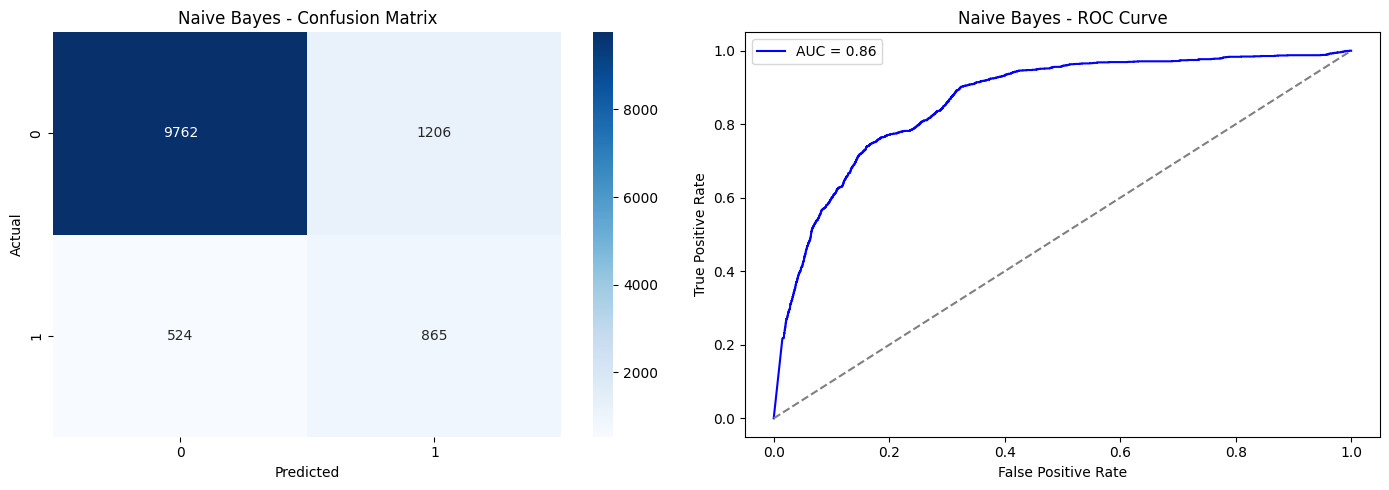

📋 Classification Report - Naive Bayes:

              precision    recall  f1-score   support

           0       0.95      0.89      0.92     10968
           1       0.42      0.62      0.50      1389

    accuracy                           0.86     12357
   macro avg       0.68      0.76      0.71     12357
weighted avg       0.89      0.86      0.87     12357

Tuned NB metrics =  
Accuracy: 85.9998381484179 
Precision: 41.76726219217769 
Recall: 62.27501799856011 
F1: 50.0


In [33]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, auc


param_grid_nb = {
    'var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06]
}

grid_nb = GridSearchCV(GaussianNB(), param_grid_nb, cv=3, scoring='f1', n_jobs=-1)
grid_nb.fit(X_train, y_train)
best_nb = grid_nb.best_estimator_
y_pred_nb = best_nb.predict(X_test)
y_proba_nb = best_nb.predict_proba(X_test)[:, 1]


fig, axes = plt.subplots(1, 2, figsize=(14, 5))


sns.heatmap(confusion_matrix(y_test, y_pred_nb), annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Naive Bayes - Confusion Matrix')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')


fpr, tpr, _ = roc_curve(y_test, y_proba_nb)
roc_auc = auc(fpr, tpr)
axes[1].plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}', color='blue')
axes[1].plot([0, 1], [0, 1], linestyle='--', color='gray')
axes[1].set_title('Naive Bayes - ROC Curve')
axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate')
axes[1].legend()

plt.tight_layout()
plt.show()



print("📋 Classification Report - Naive Bayes:\n")
print(classification_report(y_test, y_pred_nb))

from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

NBaccuracy = accuracy_score(y_test,y_pred_nb)*100
NBprescesion = precision_score(y_test,y_pred_nb)*100
NBrecall = recall_score(y_test,y_pred_nb)*100
NBf1 = f1_score(y_test,y_pred_nb)*100

print("Tuned NB metrics = ", '\nAccuracy:',NBaccuracy , '\nPrecision:',NBprescesion, '\nRecall:',NBrecall, '\nF1:',NBf1)


##X G Boost Classifier

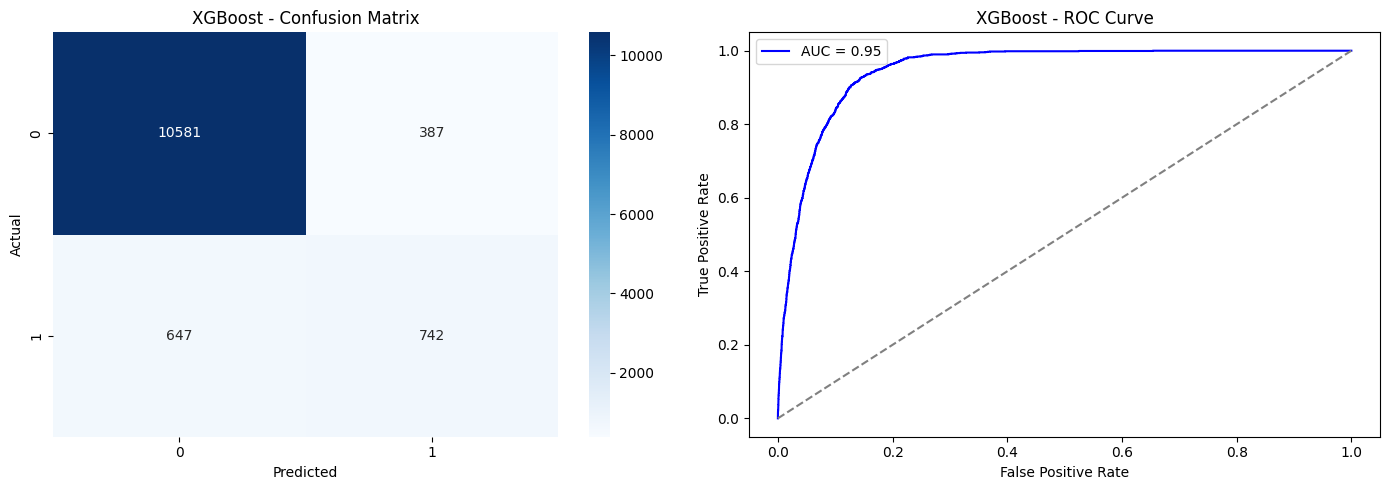

Classification Report - XGBoost:

              precision    recall  f1-score   support

           0       0.94      0.96      0.95     10968
           1       0.66      0.53      0.59      1389

    accuracy                           0.92     12357
   macro avg       0.80      0.75      0.77     12357
weighted avg       0.91      0.92      0.91     12357

Tuned XG Boost metrics =  
Accuracy: 91.63227320547058 
Precision: 65.72187776793623 
Recall: 53.419726421886246 
F1: 58.935663224781585


In [34]:
from xgboost import XGBClassifier

param_grid_xgb = {
    'n_estimators': [100, 200],
    'max_depth': [3, 6, 10],
    'learning_rate': [0.01, 0.1, 0.2]
}

grid_xgb = GridSearchCV(XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
                        param_grid_xgb, cv=3, scoring='f1', n_jobs=-1)
grid_xgb.fit(X_train, y_train)
best_xgb = grid_xgb.best_estimator_
y_pred_xgb = best_xgb.predict(X_test)
y_proba_xgb = best_xgb.predict_proba(X_test)[:, 1]



fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.heatmap(confusion_matrix(y_test, y_pred_xgb), annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('XGBoost - Confusion Matrix')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

fpr, tpr, _ = roc_curve(y_test, y_proba_xgb)
roc_auc = auc(fpr, tpr)
axes[1].plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}', color='blue')
axes[1].plot([0, 1], [0, 1], linestyle='--', color='gray')
axes[1].set_title('XGBoost - ROC Curve')
axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate')
axes[1].legend()

plt.tight_layout()
plt.show()



print("Classification Report - XGBoost:\n")
print(classification_report(y_test, y_pred_xgb))

XGaccuracy = accuracy_score(y_test,y_pred_xgb)*100
XGprescesion = precision_score(y_test,y_pred_xgb)*100
XGrecall = recall_score(y_test,y_pred_xgb)*100
XGf1 = f1_score(y_test,y_pred_xgb)*100

print("Tuned XG Boost metrics = ", '\nAccuracy:',XGaccuracy , '\nPrecision:',XGprescesion, '\nRecall:',XGrecall, '\nF1:',XGf1)

##Best Parameters

In [35]:
best_params_summary = {
    'Logistic Regression': grid_lr.best_params_,
    'KNN': grid_knn.best_params_,
    'Decision Tree': grid_dt.best_params_,
    'Random Forest': grid_rf.best_params_,
    'XGBoost': grid_xgb.best_params_,
    'Naive Bayes': grid_nb.best_params_
}

for model, params in best_params_summary.items():
    print(f"{model}: {params}")


Logistic Regression: {'C': 1, 'solver': 'lbfgs'}
KNN: {'n_neighbors': 5, 'weights': 'uniform'}
Decision Tree: {'max_depth': 5, 'min_samples_split': 2}
Random Forest: {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 100}
XGBoost: {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 200}
Naive Bayes: {'var_smoothing': 1e-06}


#Summary

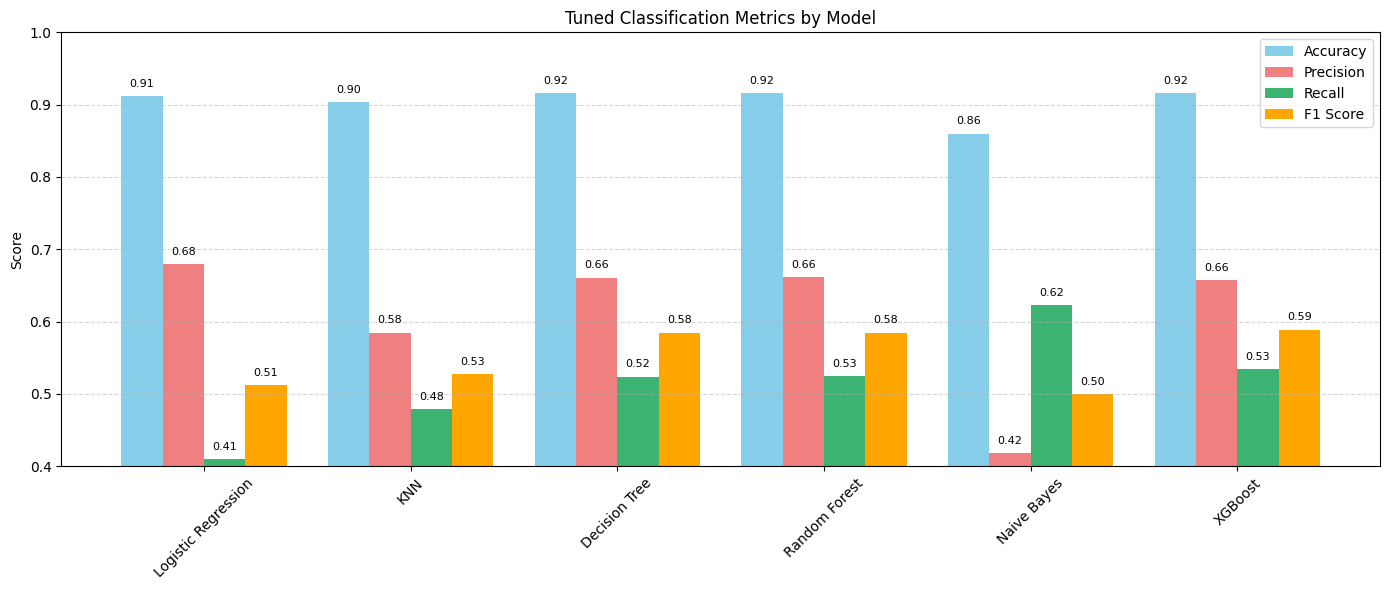

In [36]:
import matplotlib.pyplot as plt
import numpy as np

models = [
    'Logistic Regression', 'KNN', 'Decision Tree',
    'Random Forest', 'Naive Bayes', 'XGBoost'
]

accuracy =  [91.20, 90.33, 91.63, 91.64, 86.00, 91.63]
precision = [68.02, 58.54, 66.12, 66.15, 41.77, 65.72]
recall =    [41.04, 47.88, 52.41, 52.48, 62.28, 53.42]
f1_score =  [51.19, 52.67, 58.47, 58.53, 50.00, 58.94]

accuracy = [round(a / 100, 3) for a in accuracy]
precision = [round(p / 100, 3) for p in precision]
recall = [round(r / 100, 3) for r in recall]
f1_score = [round(f / 100, 3) for f in f1_score]

x = np.arange(len(models))
bar_width = 0.2

plt.figure(figsize=(14, 6))

bars1 = plt.bar(x - 1.5 * bar_width, accuracy, width=bar_width, label='Accuracy', color='skyblue')
bars2 = plt.bar(x - 0.5 * bar_width, precision, width=bar_width, label='Precision', color='lightcoral')
bars3 = plt.bar(x + 0.5 * bar_width, recall, width=bar_width, label='Recall', color='mediumseagreen')
bars4 = plt.bar(x + 1.5 * bar_width, f1_score, width=bar_width, label='F1 Score', color='orange')

def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2., height + 0.01,
                 f'{height:.2f}', ha='center', va='bottom', fontsize=8)

for bar_group in [bars1, bars2, bars3, bars4]:
    add_labels(bar_group)

plt.xticks(ticks=x, labels=models, rotation=45)
plt.ylim(0.4, 1.0)
plt.ylabel('Score')
plt.title('Tuned Classification Metrics by Model')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


###Top Overall Performers (Balanced Metrics):
- Decision Tree, Random Forest, and XGBoost stand out with:
1. High Accuracy (~0.92)

- Balanced Precision & Recall
2. Best F1 Scores (~0.58)


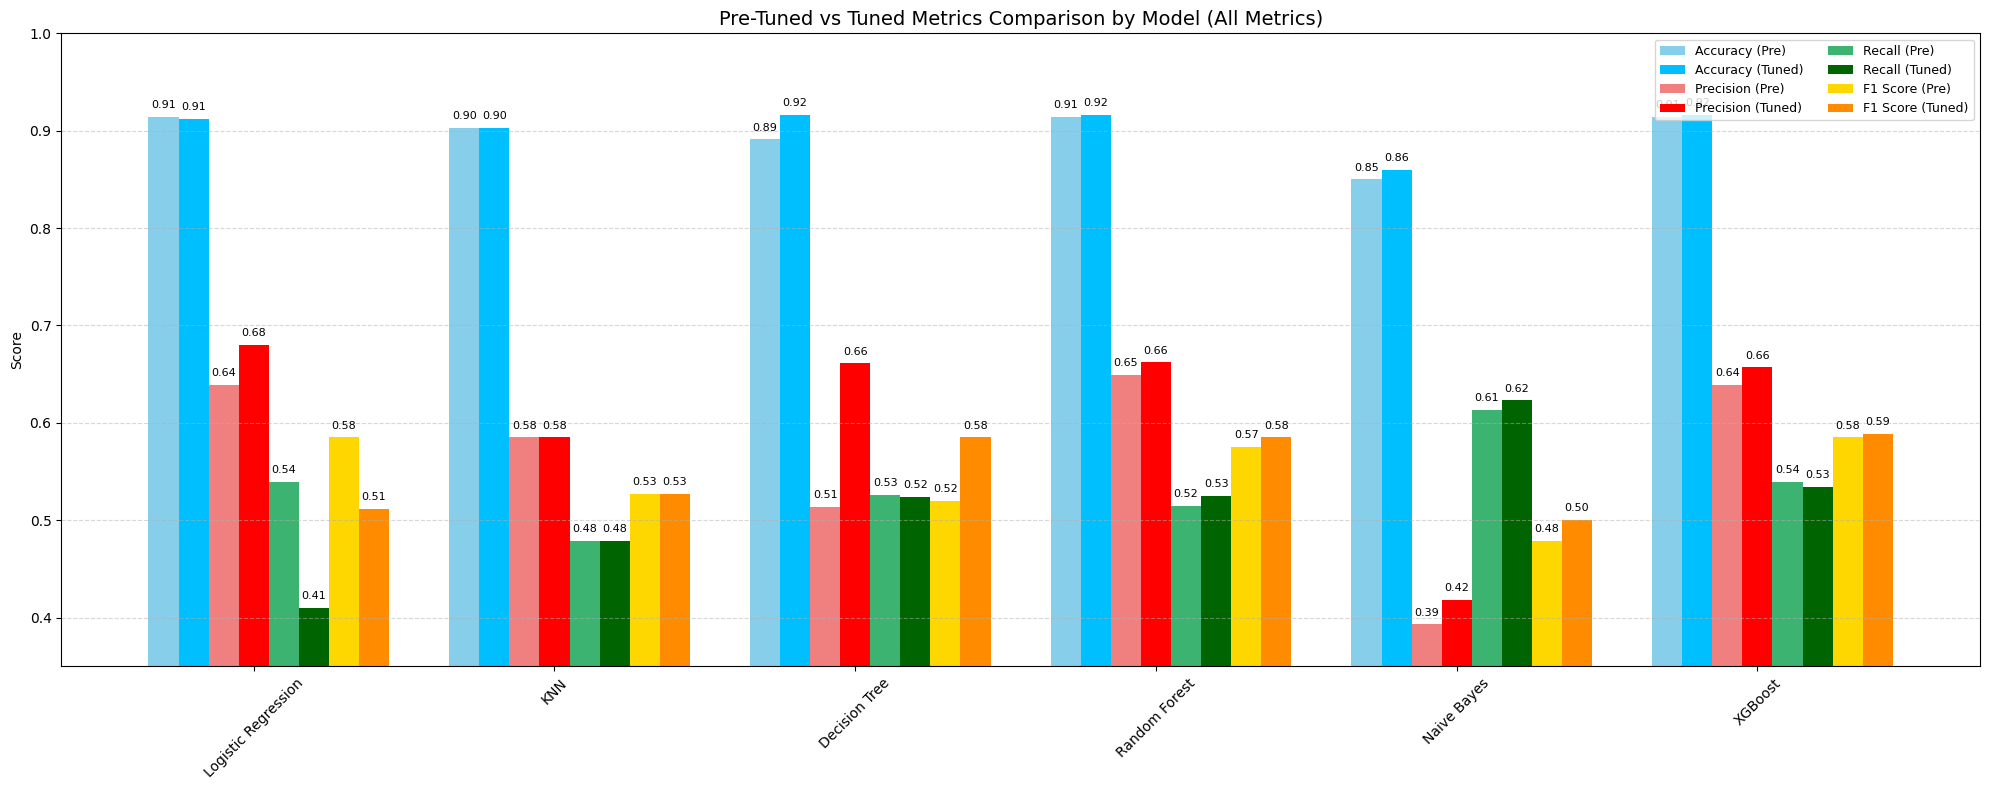

In [37]:
import matplotlib.pyplot as plt
import numpy as np

models = ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'Naive Bayes', 'XGBoost']
x = np.arange(len(models))
bar_width = 0.1

acc_pre =  [91.38, 90.33, 89.08, 91.42, 85.01, 91.39]
prec_pre = [63.85, 58.54, 51.41, 64.91, 39.31, 63.85]
rec_pre  = [53.92, 47.88, 52.63, 51.55, 61.27, 53.92]
f1_pre   = [58.46, 52.67, 52.01, 57.46, 47.89, 58.47]

acc_post = [91.20, 90.33, 91.63, 91.64, 86.00, 91.63]
prec_post = [68.02, 58.54, 66.12, 66.15, 41.77, 65.72]
rec_post  = [41.04, 47.88, 52.41, 52.48, 62.28, 53.42]
f1_post   = [51.19, 52.67, 58.47, 58.53, 50.00, 58.94]


def normalize(lst): return [round(x/100, 3) for x in lst]
acc_pre, acc_post = normalize(acc_pre), normalize(acc_post)
prec_pre, prec_post = normalize(prec_pre), normalize(prec_post)
rec_pre, rec_post = normalize(rec_pre), normalize(rec_post)
f1_pre, f1_post = normalize(f1_pre), normalize(f1_post)


plt.figure(figsize=(20, 8))

metric_groups = [
    ('Accuracy', acc_pre, acc_post, 'skyblue', 'deepskyblue'),
    ('Precision', prec_pre, prec_post, 'lightcoral', 'red'),
    ('Recall', rec_pre, rec_post, 'mediumseagreen', 'darkgreen'),
    ('F1 Score', f1_pre, f1_post, 'gold', 'darkorange'),
]


for i, (label, pre, post, c1, c2) in enumerate(metric_groups):
    offset = (i - 1.5) * bar_width * 2
    bars_pre = plt.bar(x + offset, pre, width=bar_width, label=f'{label} (Pre)', color=c1)
    bars_post = plt.bar(x + offset + bar_width, post, width=bar_width, label=f'{label} (Tuned)', color=c2)
    for bar in bars_pre + bars_post:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2., height + 0.007,
                 f'{height:.2f}', ha='center', va='bottom', fontsize=8)


plt.xticks(ticks=x, labels=models, rotation=45, fontsize=10)
plt.ylim(0.35, 1.0)
plt.ylabel('Score')
plt.title('Pre-Tuned vs Tuned Metrics Comparison by Model (All Metrics)', fontsize=14)
plt.legend(ncol=2, fontsize=9)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


###XGBoost Consistently high across all metrics after tuning:
- Accuracy: 0.92

- Precision: 0.66

- Recall: 0.53

- F1 Score: 0.59


###Notable Improvements from Tuning
- Decision Tree
1. Big jump in Precision (from 0.51 ➝ 0.66) and F1 Score (from 0.52 ➝ 0.58)
2. Accuracy improved from 0.89 ➝ 0.92

- Random Forest
1. Slight boost in all metrics, excellent consistency
2. Precision: 0.66, Accuracy: 0.92, F1: 0.58


###Logistic Regression
- Precision increased (0.64 ➝ 0.68)
- But Recall dropped significantly (0.54 ➝ 0.41)

###Naive Bayes
- Excellent recall (0.62) after tuning → good for catching positives
- Low precision (~0.42) → high false positives

# Summary

This project evaluates seven classification models on the Bank Marketing dataset to predict whether a customer will subscribe to a term deposit. After data preprocessing, we trained and tuned the following models:

- Logistic Regression
- K-Nearest Neighbors
- Decision Tree
- Random Forest
- Support Vector Machine (SVM)
- XGBoost
- Naive Bayes
---
## Key Findings:
Each model was evaluated using:
- Accuracy
- Precision
- Recall
- F1 Score
- ROC Curve and AUC

---
## Hyperparameter Tuning

For each model, I used **GridSearchCV** to tune important parameters like:
- `C`, `solver` for Logistic Regression
- `n_neighbors` for KNN
- `max_depth`, `min_samples_split` for Decision Tree and Random Forest
- `learning_rate`, `n_estimators` for XGBoost
- `var_smoothing` for Naive Bayes

Tuning was performed using **F1 Score** as the scoring metric with **3-fold cross-validation**.

---

##  Results Summary

After tuning, we observed improvements in multiple models. Key highlights:

- **XGBoost** gave the best overall performance with an F1 Score of **0.59**, Accuracy of **0.92**, and balanced Precision and Recall.
- **Random Forest** and **Decision Tree** also showed strong improvements.
- **Naive Bayes** had the highest **Recall (0.62)** but low Precision, useful if false negatives are critical.
- **Logistic Regression** had strong Precision but suffered in Recall after tuning.

##Conclusion:
**XGBoost** is recommended due to its strong balance of precision, recall, and AUC performance.

